### Introduction: Project Goal
    
The goal of this project is to uncover insights about Hulu shows to understand historical patterns and trends.

### Background

### Data and Methodology
This Hulu TV Shows and Movies data set was retrieved from the Kaggle data set library https://www.kaggle.com/datasets/victorsoeiro/hulu-tv-shows-and-movies

In [1]:
import pandas as pd
import numpy as np

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("hulu-titles.csv")
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20475,Saturday Night Live,SHOW,A late-night live television sketch comedy and...,1975,TV-14,89,"['music', 'comedy']",['US'],47.0,tt0072562,8.0,47910.0,54.345,6.9
1,ts20413,M*A*S*H,SHOW,The 4077th Mobile Army Surgical Hospital is st...,1972,TV-PG,26,"['war', 'comedy', 'drama']",['US'],11.0,tt0068098,8.4,55882.0,27.308,8.0
2,ts20005,I Love Lucy,SHOW,Cuban Bandleader Ricky Ricardo would be happy ...,1951,TV-G,30,"['comedy', 'family']",['US'],9.0,tt0043208,8.5,25944.0,17.088,8.1
3,ts20669,Taxi,SHOW,"Louie De Palma is a cantankerous, acerbic taxi...",1978,TV-PG,25,"['drama', 'comedy']",['US'],5.0,tt0077089,7.7,13379.0,14.346,7.3
4,ts21049,The Mary Tyler Moore Show,SHOW,30-year-old single Mary Richards moves to Minn...,1970,TV-PG,28,['comedy'],['US'],7.0,tt0065314,8.2,8692.0,9.290,7.5


In [3]:
print(df.shape)

(2398, 15)


View how many rows are movies

In [4]:
hulu_movies = df.loc[df['type'] == 'MOVIE']
print(hulu_movies.shape)
hulu_movies.head()

(1068, 15)


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
9,tm147043,The Lorax,MOVIE,"The Once-ler, a ruined industrialist, tells th...",1972,PG,25,"['comedy', 'animation', 'drama', 'family', 'fa...",['US'],NaN,tt0213065,7.9,2932.0,8.834,7.2
12,tm1236,A Boy Named Charlie Brown,MOVIE,"Poor Charlie Brown. He can't fly a kite, and h...",1969,G,86,"['animation', 'comedy', 'family', 'drama']",['US'],NaN,tt0064107,7.3,5001.0,8.118,6.9
13,tm156894,"Snoopy, Come Home",MOVIE,When Snoopy receives a letter from his origina...,1972,G,81,"['animation', 'drama', 'family', 'music', 'com...",['US'],NaN,tt0069289,7.4,4665.0,6.630,6.9
14,tm11186,The Cat in the Hat,MOVIE,In a marvelously animated version of one of th...,1971,NaN,25,"['family', 'animation', 'comedy', 'fantasy']",['US'],NaN,tt0284714,7.3,1921.0,2.979,6.7
15,tm189299,Dr. Seuss on the Loose,MOVIE,"The pressure to conform, the inevitability of ...",1973,NaN,25,"['family', 'animation', 'comedy']",[],NaN,tt0134628,7.7,632.0,4.353,7.6


In [5]:
hulu_relyear_avgrating = df.loc[df['type'] == 'MOVIE'].groupby(['release_year']).mean().reset_index()
hulu_relyear_avgrating.sort_values('release_year',ascending=True, inplace=True)
hulu_relyear_avgrating.head()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,1969,86.0,NaN,7.30,5001.0,8.118,6.90
1,1971,25.0,NaN,7.30,1921.0,2.979,6.70
2,1972,53.0,NaN,7.65,3798.5,7.732,7.05
3,1973,25.0,NaN,7.70,632.0,4.353,7.60
4,1982,37.0,NaN,NaN,NaN,0.947,7.30


In [6]:
hulu_relyear_avgrating.tail()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
38,2018,89.244186,NaN,6.445205,18835.465753,9.386753,6.240476
39,2019,92.959770,NaN,6.125658,11685.072848,8.588564,6.182941
40,2020,95.500000,NaN,5.812687,9226.395522,13.606716,6.124503
41,2021,95.985185,NaN,5.727132,6858.674419,33.046699,6.415625
42,2022,89.785714,NaN,5.738462,8867.461538,242.705643,6.028571


In [7]:
print(hulu_relyear_avgrating['release_year'].unique())

[1969 1971 1972 1973 1982 1984 1985 1986 1987 1988 1989 1990 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 2022]


#### Insights:
* The average IMDB rating has slightly decreased from 7.5 for movies on Hulu released in the late 1960s/early 1970s to 6 in the late 2010s/early 2020s

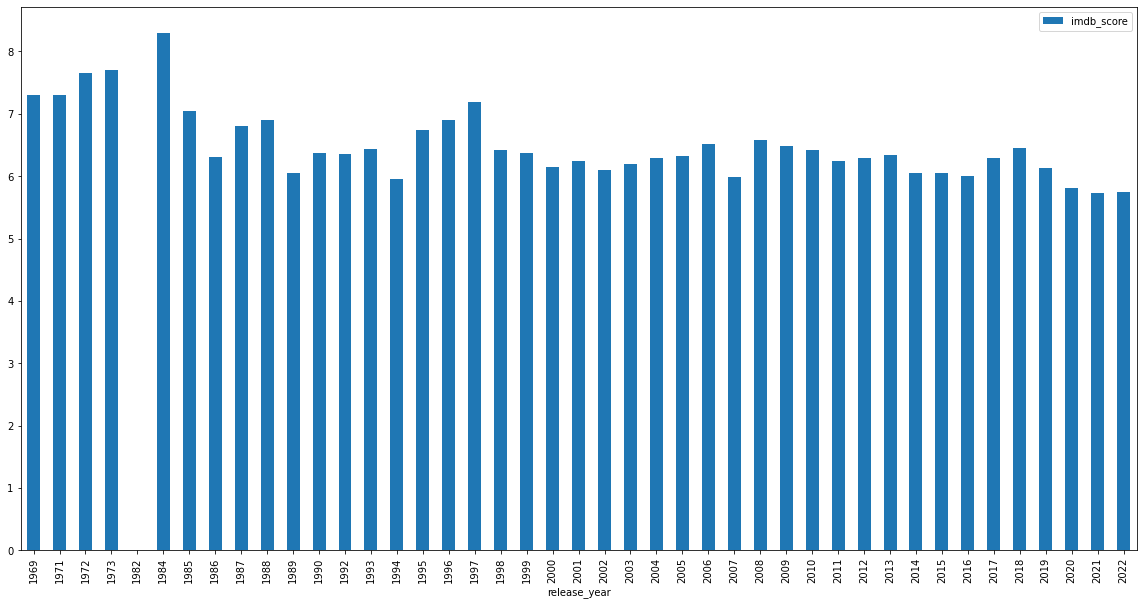

In [8]:
plot_count = hulu_relyear_avgrating.plot.bar(x='release_year', y='imdb_score', figsize=(20, 10), rot=90)

#### View distribution of genres 

In [9]:
print(df['age_certification'].unique())

['TV-14' 'TV-PG' 'TV-G' nan 'PG' 'G' 'R' 'PG-13' 'TV-Y7' 'TV-MA' 'TV-Y'
 'NC-17']


In [20]:
hulu_age_cert_count = df.loc[df['type'] == 'MOVIE'].groupby(['release_year','age_certification']).count().reset_index()
hulu_age_cert_count.sort_values('release_year',ascending=True, inplace=True)
hulu_age_cert_count.head(10)

,release_year,age_certification,id,title,type,description,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,1969,G,1,1,1,1,1,1,1,0,1,1,1,1,1
1,1972,G,1,1,1,1,1,1,1,0,1,1,1,1,1
2,1972,PG,1,1,1,1,1,1,1,0,1,1,1,1,1
3,1984,R,1,1,1,1,1,1,1,0,1,1,1,1,1
4,1985,R,2,2,2,2,2,2,2,0,2,2,2,2,2
5,1986,PG,1,1,1,1,1,1,1,0,1,1,1,1,1
6,1986,PG-13,1,1,1,1,1,1,1,0,1,1,1,1,1
7,1987,PG,2,2,2,2,2,2,2,0,2,2,2,2,2
8,1987,PG-13,2,2,2,2,2,2,2,0,2,2,2,2,2
9,1988,R,1,1,1,1,1,1,1,0,1,1,1,1,1


#### Insights:
* There is an increasing catalogue of movies rated R on Hulu with release years around 2020 compared with those from the 2010s and earlier

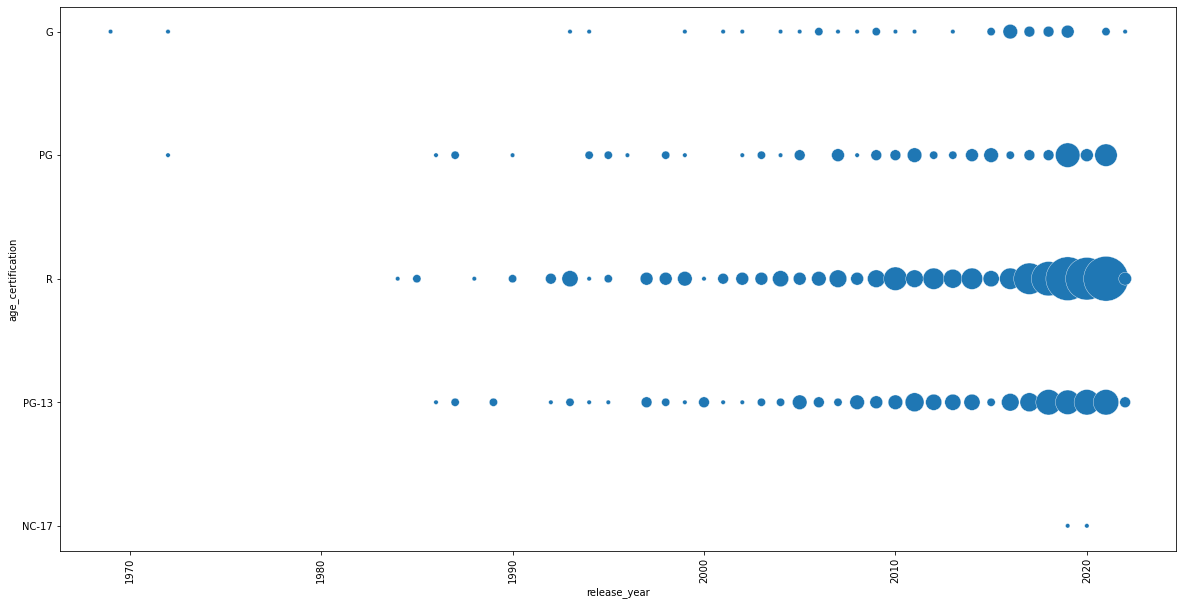

In [19]:
# use the scatterplot function to build the bubble map
plt.figure(figsize = (20,10))
sns.scatterplot(data=hulu_age_cert_count, x="release_year", y="age_certification", size="title", legend=False, sizes=(20, 2000))
plt.xticks(rotation=90)

# show the graph
plt.show()

In [25]:
hulu_age_cert_count_show = df.loc[df['type'] == 'SHOW'].groupby(['release_year','age_certification']).count().reset_index()
hulu_age_cert_count_show.sort_values('release_year',ascending=True, inplace=True)
hulu_age_cert_count_show.tail(10)

,release_year,age_certification,id,title,type,description,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
151,2020,TV-14,37,37,37,37,37,37,37,37,31,31,31,36,35
152,2020,TV-G,2,2,2,2,2,2,2,2,2,2,2,2,2
157,2021,TV-14,25,25,25,25,25,25,25,25,21,21,21,25,22
158,2021,TV-G,1,1,1,1,1,1,1,1,1,1,1,1,1
159,2021,TV-MA,17,17,17,17,17,17,17,17,13,13,13,17,16
160,2021,TV-PG,13,13,13,13,13,13,13,13,13,13,13,13,12
161,2021,TV-Y,1,1,1,1,1,1,1,1,1,0,0,1,1
163,2022,TV-MA,6,6,6,6,6,6,6,6,6,6,6,6,5
162,2022,TV-14,12,12,12,12,12,12,12,12,12,12,12,12,11
164,2022,TV-PG,3,3,3,3,3,3,3,3,2,2,2,3,2


#### Insights:
* Most movies on Hulu are rated R or PG-13 while most shows on Hulu are TV-14

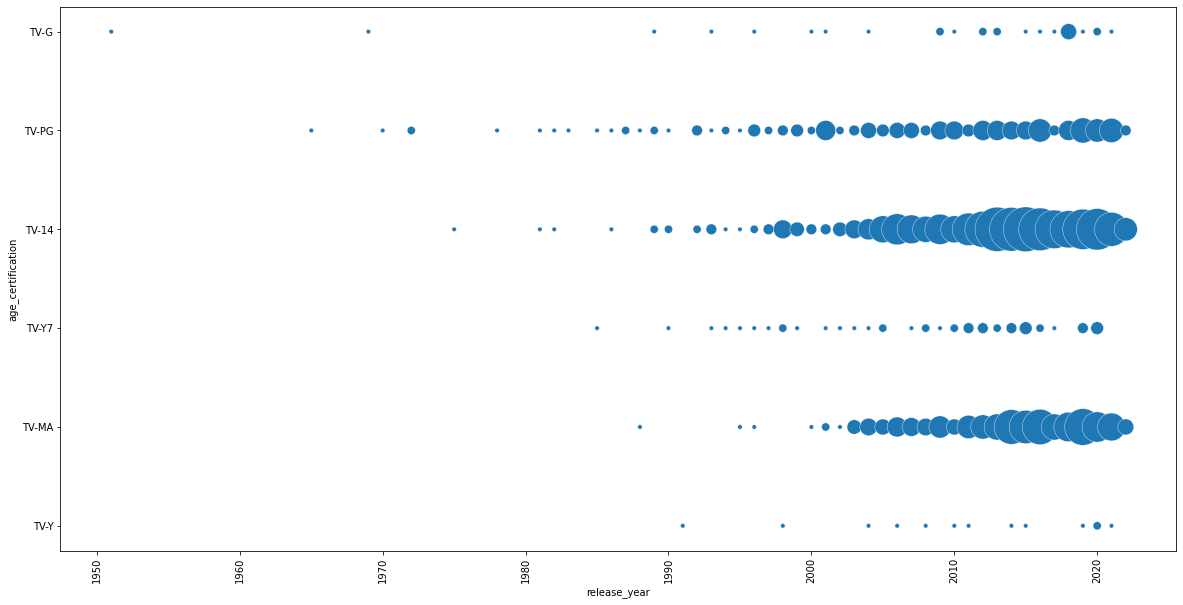

In [24]:
# use the scatterplot function to build the bubble map
plt.figure(figsize = (20,10))
sns.scatterplot(data=hulu_age_cert_count_show, x="release_year", y="age_certification", size="title", legend=False, sizes=(20, 2000))
plt.xticks(rotation=90)

# show the graph
plt.show()